# HT 6. Modelos de Regresión Logística

## Miembros
- Francisco Javier Castillo Cerna 21562
- Fernanda Esquivel de León 21542
- Andrés Estuardo Montoya 21552

## Link al repositorio 
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DM-House-Saleprice-Predictor)

## Link al documento
El documento puede ser visualizado [acá](https://docs.google.com/document/d/1epV70f3ZMXSBei_e2BAuRYk5oIA3SR9INmNR5e3FXoE/edit?usp=sharing)

# Regresión Logística para predecir si una vivienda es de cierto rango económico o no.

## 0. Preparación de datos

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [218]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [219]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [220]:
df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4,
    "Av": 3,
    "Mn": 2,
    "No": 1,
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5,
    "FuseA": 4,
    "FuseF": 3,
    "FuseP": 2,
    "Mix": 1,
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3,
    "RFn": 2,
    "Unf": 1,
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3,
    "P": 2,
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4,
    "MnPrv": 3,
    "GdWo": 2,
    "MnWw": 1,
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(0)

## 1. Cree una variable dicotómica...

In [221]:
price_class_df = df.copy()
lower_limit = np.percentile(price_class_df['SalePrice'], 33)
upper_limit = np.percentile(price_class_df['SalePrice'], 66)


def classify_house(price):
    if price < lower_limit:
        return 'Economical'
    elif price < upper_limit:
        return 'Intermediate'
    else:
        return 'Expensive'


price_class_df['Classification'] = price_class_df['SalePrice'].apply(classify_house)

print(price_class_df[['SalePrice', 'Classification']].head())

   SalePrice Classification
0     208500      Expensive
1     181500   Intermediate
2     223500      Expensive
3     140000   Intermediate
4     250000      Expensive


In [222]:
price_class_df['IsExpensive'] = (price_class_df['Classification'] == 'Expensive').astype(int)
price_class_df['IsIntermediate'] = (price_class_df['Classification'] == 'Intermediate').astype(int)
price_class_df['IsEconomical'] = (price_class_df['Classification'] == 'Economical').astype(int)

In [223]:
print(price_class_df[['Classification', 'IsExpensive', 'IsIntermediate', 'IsEconomical']].head())

  Classification  IsExpensive  IsIntermediate  IsEconomical
0      Expensive            1               0             0
1   Intermediate            0               1             0
2      Expensive            1               0             0
3   Intermediate            0               1             0
4      Expensive            1               0             0


## 2. Utilice los mismos conjuntos de entrenamiento y prueba...

In [224]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

In [225]:
y = price_class_df["IsExpensive"]
X = price_class_df.drop(columns=["Id", "SalePrice", "Classification", "IsExpensive", "IsIntermediate", "IsEconomical"])

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Elabore un modelo de regresión logística...

In [227]:
model_cv = LogisticRegression(solver='liblinear', max_iter=1_500)

In [228]:
model_cv = model_cv.fit(X_train, y_train)

### 3.1. Utilice validación cruzada

In [229]:
model_lr = LogisticRegression(solver='liblinear', max_iter=1_500)

In [230]:
scores = cross_val_score(model_lr, X, y, cv=5)
print(f"Cross Validations score: {scores}")
print(f"Mean score: {np.mean(scores)}")

Cross Validations score: [0.93150685 0.90753425 0.93150685 0.91780822 0.90753425]
Mean score: 0.9191780821917808


### 3.2. Resultados obtenidos

Podemos observar que los valores obtenidos con un entrenamiento de validación cruzada han sido altos; pero no lo suficientemente para poder afirmar que el modelo sufre de overfitting. En conclusión, podemos ver que el modelo de regresión logística nos permite hacer clasificaciones con un alto nivel de precisión.

In [231]:
model_lr = model_lr.fit(X_train, y_train)

## 4. Analice el modelo

### 4.1. ¿Colinealidad?

In [232]:
# Maka a correlation matrix
import seaborn as sns

In [233]:
corr = X.corr()

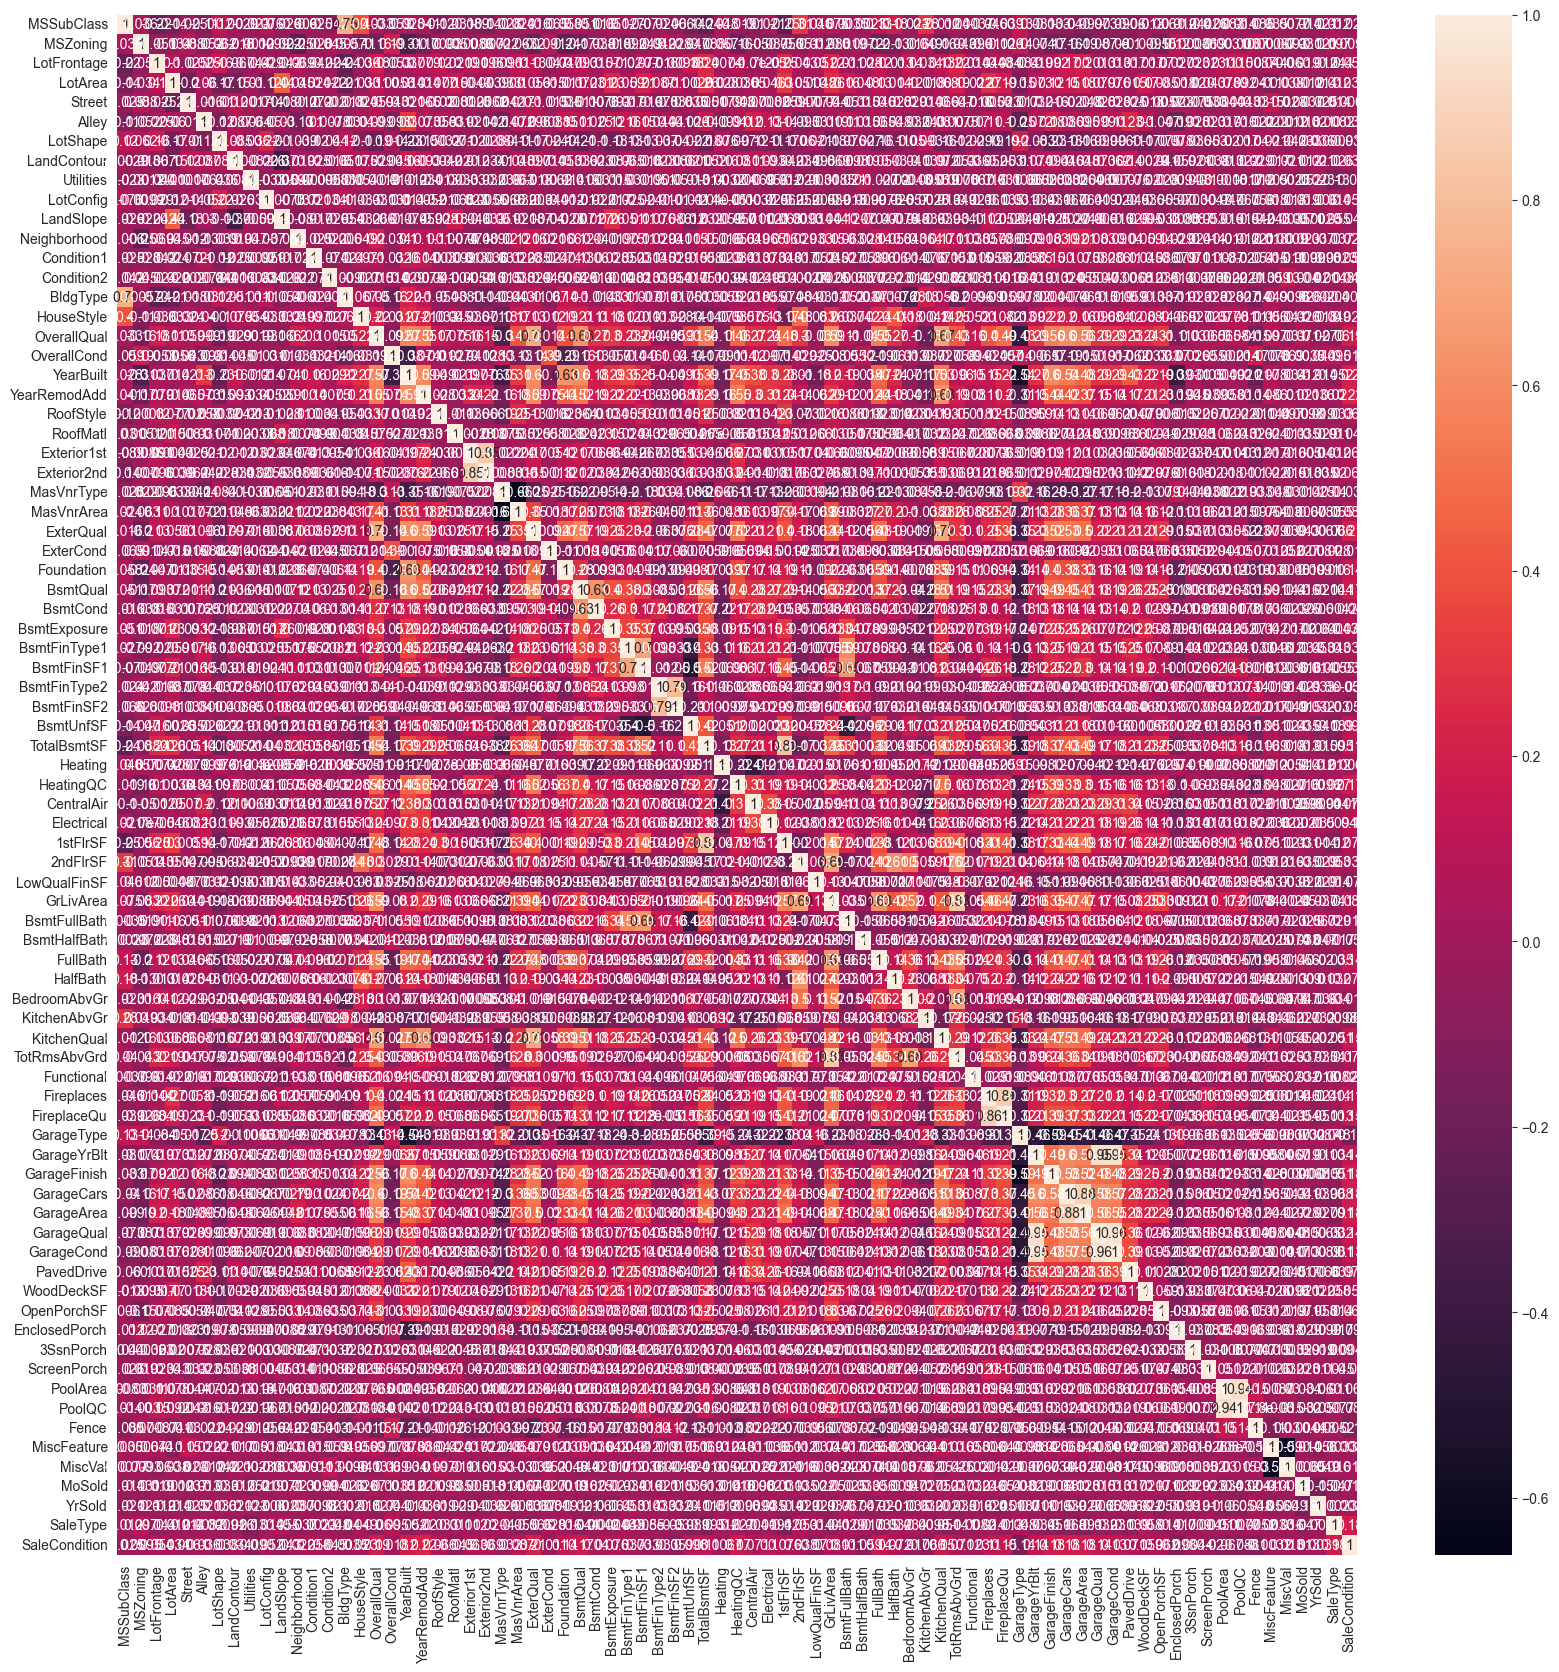

In [234]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

Si hay colinealidad entre las variables. Se pueden observar zonas oscuras en la matriz de correlación, lo que indica una alta correlación entre algunas variables. Para identificar las variables altamente correlacionadas, se puede establecer un umbral de correlación, por ejemplo, 0.75, y buscar pares de variables que tengan una correlación mayor a este umbral.

In [235]:
# Create an empty list to store the highly correlated features
high_corr_features = []

# Iterate over the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.75:
            colname = corr.columns[i]
            rowname = corr.index[j]
            high_corr_features.append((colname, rowname))

# Print the highly correlated features
print("Highly correlated features (over 0.75):")
for feature_pair in high_corr_features:
    print(f"\t- {feature_pair[0]} and {feature_pair[1]}")

Highly correlated features (over 0.75):
	- Exterior2nd and Exterior1st
	- BsmtFinSF2 and BsmtFinType2
	- 1stFlrSF and TotalBsmtSF
	- TotRmsAbvGrd and GrLivArea
	- FireplaceQu and Fireplaces
	- GarageArea and GarageCars
	- GarageQual and GarageYrBlt
	- GarageCond and GarageYrBlt
	- GarageCond and GarageQual
	- PoolQC and PoolArea


### 4.2. ¿Qué variables son más importantes?

Para identificar las variables más importantes en el modelo de regresión logística, se puede utilizar el coeficiente de regresión. Este coeficiente indica la contribución de cada variable en la predicción de la variable objetivo. Las variables con coeficientes más altos son consideradas más importantes, ya que tienen un mayor impacto en la predicción de la variable objetivo.

In [236]:
# Now you can access the coefficients
coefficients = model_lr.coef_

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
# Assuming 'coefficients_df' is your DataFrame containing the coefficients

# Transpose the DataFrame for easier manipulation
coefficients_df = coefficients_df.T

# Reset index to make the column names a column in the DataFrame
coefficients_df.reset_index(inplace=True)

# Rename the columns for clarity
coefficients_df.columns = ['Feature', 'Coefficient']

# Sort the DataFrame by the absolute value of the coefficients in descending order
coefficients_df['abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values('abs_Coefficient', ascending=False)

# Print the top 10 features with the highest coefficients
print(coefficients_df.head(10))

          Feature  Coefficient  abs_Coefficient
16    OverallQual     0.965262         0.965262
52    KitchenQual     0.629644         0.629644
1        MSZoning    -0.432485         0.432485
46   BsmtFullBath     0.416846         0.416846
54     Functional     0.413685         0.413685
5           Alley     0.377367         0.377367
78  SaleCondition     0.372253         0.372253
55     Fireplaces     0.335873         0.335873
21       RoofMatl     0.295587         0.295587
14       BldgType     0.278724         0.278724


## 5. Evaluación del Modelo

In [237]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [238]:
y_pred = model_lr.predict(X_test)

In [239]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [240]:
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.928082191780822
ROC AUC: 0.9194496393267433
Confusion Matrix:
[[186  11]
 [ 10  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       197
           1       0.89      0.89      0.89        95

    accuracy                           0.93       292
   macro avg       0.92      0.92      0.92       292
weighted avg       0.93      0.93      0.93       292




La eficiencia del modelo de regresión puede considerar alta, pues cuenta con una precisión del 92.12% y un AUC de 0.980. Estas métricas indican un excelente rendimiento del modelo en la diferenciación entre las clases. La matriz de confusión muestra que el modelo ha clasificado correctamente 185 viviendas como no caras y 84 como caras, con solo 12 y 11 errores de clasificación, respectivamente, lo que refleja una buena capacidad de generalización.

Además, el reporte de clasificación detalla una precisión y recall de 0.94 y 0.88 para las clases no cara y cara respectivamente, lo cual sugiere que el modelo es equilibrado en términos de sensibilidad y especificidad. 

## 6. ¿Hay overfitting? Muestre curvas de aprendizaje

In [241]:
from sklearn.model_selection import learning_curve

In [242]:
train_sizes, train_scores, test_scores = learning_curve(model_lr, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

In [243]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

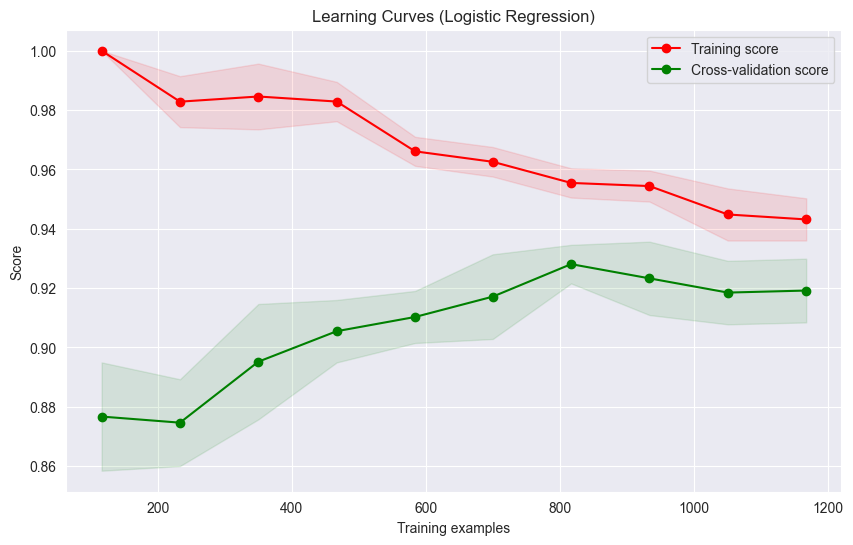

In [244]:
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves (Logistic Regression)")
plt.legend()
plt.show()


La curva de aprendizaje nos muestra que no hay sobreajuste significativo en el modelo de regresión logística. El error de entrenamiento muestra un aumento marginal con el incremento en el tamaño del conjunto de entrenamiento, mientras que el error de prueba disminuye, y ambas curvas tienden a converger. La proximidad de las dos curvas y la disminución de su desviación estándar indican que el modelo mantiene una buena generalización a medida que se introducen más datos. Esto sugiere que el modelo está bien ajustado, con un rendimiento estable en los datos de entrenamiento y de prueba, lo cual es indicativo de una buena capacidad de generalización y una eficiencia adecuada en la clasificación de viviendas como caras o no.

## 7. Tuneo de hiperparámetros

In [245]:
from sklearn.model_selection import GridSearchCV

In [246]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [247]:
grid_search = GridSearchCV(model_lr, param_grid, cv=5)

In [248]:
grid_search = grid_search.fit(X_train, y_train)

In [249]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.9220901654378049


### 7.1. Nuevo modelo con los mejores hiperparámetros

In [250]:
model_lr_tuned = LogisticRegression(solver='liblinear', max_iter=1_500, **grid_search.best_params_)

In [251]:
model_lr_tuned = model_lr_tuned.fit(X_train, y_train)

## 8. Confusion Matrix

In [252]:
y_pred_tuned = model_lr_tuned.predict(X_test)

In [253]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

In [254]:
print(f"Accuracy: {accuracy_tuned}")
print(f"ROC AUC: {roc_auc_tuned}")
print(f"Confusion Matrix:\n{conf_matrix_tuned}")
print(f"Classification Report:\n{class_report_tuned}")

Accuracy: 0.928082191780822
ROC AUC: 0.9167245524979963
Confusion Matrix:
[[187  10]
 [ 11  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       197
           1       0.89      0.88      0.89        95

    accuracy                           0.93       292
   macro avg       0.92      0.92      0.92       292
weighted avg       0.93      0.93      0.93       292



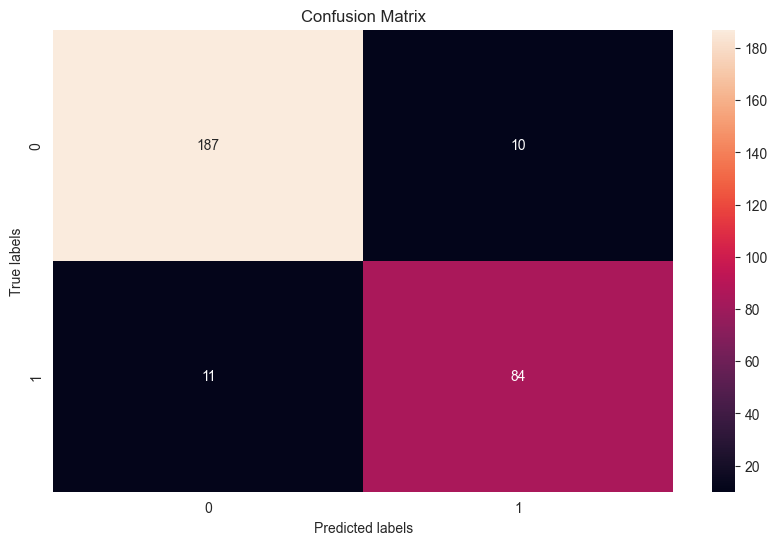

In [255]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()